In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [134]:
df = pd.read_csv('Downloads/adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


**Part 1: Decision Trees – Theory &amp; Implementation**

Explain: Gini impurity vs Entropy<br>
Gini Impurity and Entropy are metrics used in Decision Trees to measure the “impurity” or disorder of a node, helping the tree decide the best feature to split on. <br>Gini Impurity calculates the probability of incorrectly classifying a randomly chosen sample if it were assigned a label according to the class distribution in the node, with a value of 0 indicating a pure node and values closer to 1 indicating more mixed classes. <br>Entropy, on the other hand, comes from information theory and measures the uncertainty or randomness in the node, with 0 for a pure node and higher values when classes are evenly distributed. <br>While both metrics aim to identify the most informative splits, Gini is slightly faster to compute, whereas Entropy provides a more theoretical measure of information gain. In practice, they often produce similar trees, guiding the model to reduce impurity and improve classification accuracy at each split.


Explain: Overfitting in Decision Trees <br>
Overfitting in Decision Trees occurs when the model learns the training data too precisely, including noise and outliers, rather than general patterns. This usually happens when the tree grows too deep, creating branches that capture very specific cases with very few samples. As a result, the training accuracy is high, but the model performs poorly on unseen data because it cannot generalize.<br> Overfitting can be prevented by limiting the tree depth (max_depth), setting a minimum number of samples per split (min_samples_split), pruning the tree, or using ensemble methods like Random Forests, which combine multiple trees to improve generalization.

Explain: Role of max_depth, min_samples_split<br>
In Decision Trees, max_depth and min_samples_split are important hyperparameters that control the tree’s complexity and help prevent overfitting. <br>max_depth sets the maximum number of levels in the tree, limiting how deep it can grow; a smaller depth produces a simpler tree that generalizes better, while a very large depth can cause overfitting by capturing noise.<br> min_samples_split defines the minimum number of samples required to split an internal node; higher values prevent the tree from creating branches for very few samples, reducing overly specific rules and improving generalization. <br>Together, these parameters ensure the tree balances fitting the training data accurately while maintaining the ability to perform well on unseen data.

In [135]:
#handle null values
df.replace('?',None,inplace=True)

missing_cols = ['workclass','occupation','native.country']
for col in missing_cols:
    df[col].fillna(df[col].mode()[0])

In [136]:
# Target variable: numeric 0/1
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
X = df.drop(columns=['income'])

In [137]:
# Categorical & numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

In [138]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('num', 'passthrough', numerical_features)
])

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [140]:
# Decision Tree classifier pipeline
dt_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, random_state=42))
])

# Train model
dt_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [152]:
# Predictions & evaluation
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance\n")
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)

Decision Tree Performance

Decision Tree Accuracy: 0.8538307999385844
Decision Tree Precision: 0.7673611111111112
Decision Tree Recall: 0.5637755102040817
Decision Tree F1 Score: 0.65


**Part 2: Random Forests &amp; Ensembles**

Explaiin: Bagging<br>
Bagging, short for Bootstrap Aggregating, is an ensemble technique used to improve the accuracy and stability of machine learning models, particularly high-variance models like Decision Trees. In Bagging, multiple subsets of the training data are created by sampling with replacement (bootstrapping), and a separate model is trained on each subset. The predictions from all models are then combined—typically by majority voting for classification or averaging for regression—to produce the final output. This process reduces overfitting and variance because individual model errors are averaged out, making the ensemble more robust and better at generalizing to unseen data.

Explain: Why Random Forests reduce overfitting<br>
Random Forests reduce overfitting by combining the predictions of multiple Decision Trees trained on different subsets of the data and features. Each tree in the forest is trained on a random bootstrap sample of the dataset and, at each split, considers only a random subset of features. This randomness ensures that individual trees are less correlated and less likely to memorize the training data. By averaging the predictions of all trees (for regression) or using majority voting (for classification), Random Forests smooth out individual tree errors, reduce variance, and produce a more robust model that generalizes better to unseen data.

Explain: Feature Importance<br>
Feature importance measures how much each input feature contributes to a model’s predictions, helping us understand which features are most influential in determining the output. In tree-based models like Decision Trees and Random Forests, feature importance is usually calculated based on how much each feature reduces impurity (Gini or Entropy) across all splits in the trees. Features that frequently appear in top splits and lead to large decreases in impurity are considered more important. This information helps in feature selection, model interpretation, and understanding the factors that drive predictions, making the model more transparent and interpretable.

In [153]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [154]:
# Random Forest pipeline
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
])
rf_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [155]:
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Performance\n")
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

Random Forest Performance

Random Forest Accuracy: 0.8561338860740059
Random Forest Precision: 0.7951356407857811
Random Forest Recall: 0.5420918367346939
Random Forest F1 Score: 0.6446719757299962


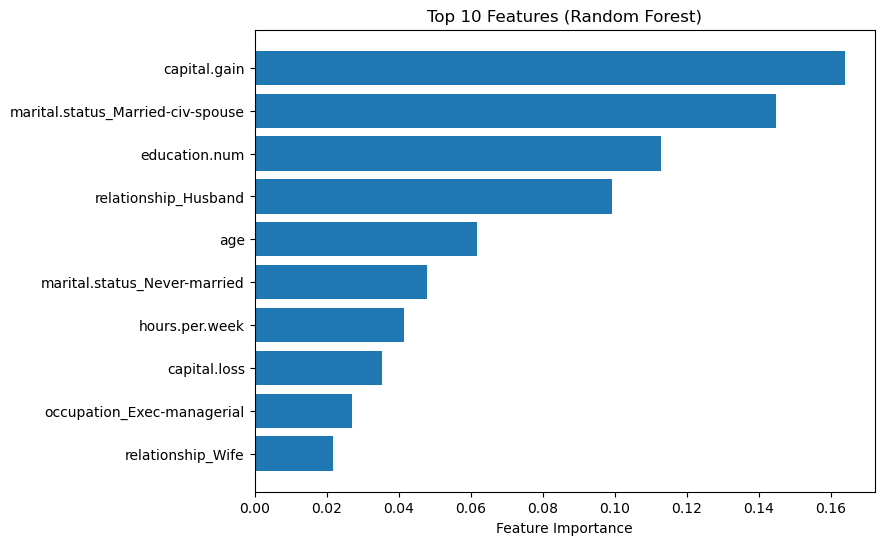

In [156]:
# Feature importance plot
rf_clf = rf_model.named_steps['classifier']
feature_names = rf_model.named_steps['preprocess'].transformers_[0][1].get_feature_names_out(categorical_features)
all_features = np.concatenate([feature_names, numerical_features])
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), all_features[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features (Random Forest)")
plt.show()

**Part 3: Gradient Boosting (XGBoost)**

Explain: Boosting vs Bagging<br>
Boosting and Bagging are both ensemble techniques, but they differ in how they combine multiple models to improve performance. <br>Bagging (Bootstrap Aggregating) trains multiple models independently on different random subsets of the data and combines their predictions, which reduces variance and prevents overfitting, making it effective for high-variance models like Decision Trees.<br> Boosting, on the other hand, trains models sequentially, where each new model focuses on correcting the errors made by the previous ones. This sequential approach reduces bias and improves accuracy by giving more weight to difficult-to-predict samples. <br>While Bagging reduces variance by averaging independent models, Boosting reduces both bias and variance by building a strong model from many weak learners.

Explain: Sequential learning<br>
Sequential learning is the process used in boosting algorithms where models are trained one after another, with each new model focusing on correcting the mistakes of the previous models. Instead of building all models independently, as in bagging, sequential learning allows the ensemble to “learn from its errors” by giving more weight to samples that were misclassified earlier. <br>This approach helps the ensemble gradually improve its predictions, reduce bias, and create a strong model from multiple weak learners, making it particularly effective for complex datasets where single models might underperform.

Explain: Learning Rate<br>
Learning rate is a hyperparameter used in boosting algorithms that controls how much each new model contributes to the overall ensemble. <br>A smaller learning rate means each model makes only a slight adjustment to correct previous errors, which can lead to more stable and accurate predictions but requires more trees and longer training. <br>A larger learning rate makes the ensemble learn faster but increases the risk of overfitting or overshooting the optimal solution. <br>Choosing an appropriate learning rate is crucial for balancing model accuracy, training time, and generalization in gradient boosting methods like XGBoost or LightGBM.

In [157]:
import xgboost as xgb

In [158]:
xgb_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

xgb_model.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:27:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [159]:
# Predictions & evaluation
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_dt)

print("XGBoost Performance\n")
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1-Score:", xgb_f1)

XGBoost Performance

XGBoost Accuracy: 0.8678028558268079
XGBoost Precision: 0.7763878029710711
XGBoost Recall: 0.6332908163265306
XGBoost F1-Score: 0.65


**Comparison Table of all models**

In [160]:
model_comparison = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [dt_accuracy, rf_accuracy, xgb_accuracy],
    "Precision": [dt_precision, rf_precision, xgb_precision],
    "Recall": [dt_recall, rf_recall, xgb_recall],
    "F1-Score": [dt_f1, rf_f1, xgb_f1]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(model_comparison)

# Display table
print("Comparison Table of all models\n", comparison_df)

Comparison Table of all models
            Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.853831   0.767361  0.563776  0.650000
1  Random Forest  0.856134   0.795136  0.542092  0.644672
2        XGBoost  0.867803   0.776388  0.633291  0.650000


**Part 4: Hyperparameter Tuning &amp; Interpretability**

RandomizedSearchCV is a hyperparameter tuning method that searches a defined parameter space by sampling a fixed number of random combinations, allowing faster and more efficient optimization compared to an exhaustive grid search.

In [161]:
from sklearn.model_selection import RandomizedSearchCV

In [162]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

In [163]:
rs = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [164]:
rs.fit(X_train, y_train)
print("Best parameters:", rs.best_params_)
print("Best CV Accuracy:", rs.best_score_)

Best parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__max_depth': 15}
Best CV Accuracy: 0.860488241866999


Tree visualization is a technique to graphically display the structure of a Decision Tree, showing how features are split at each node and how predictions are made, which helps in understanding and interpreting the model.

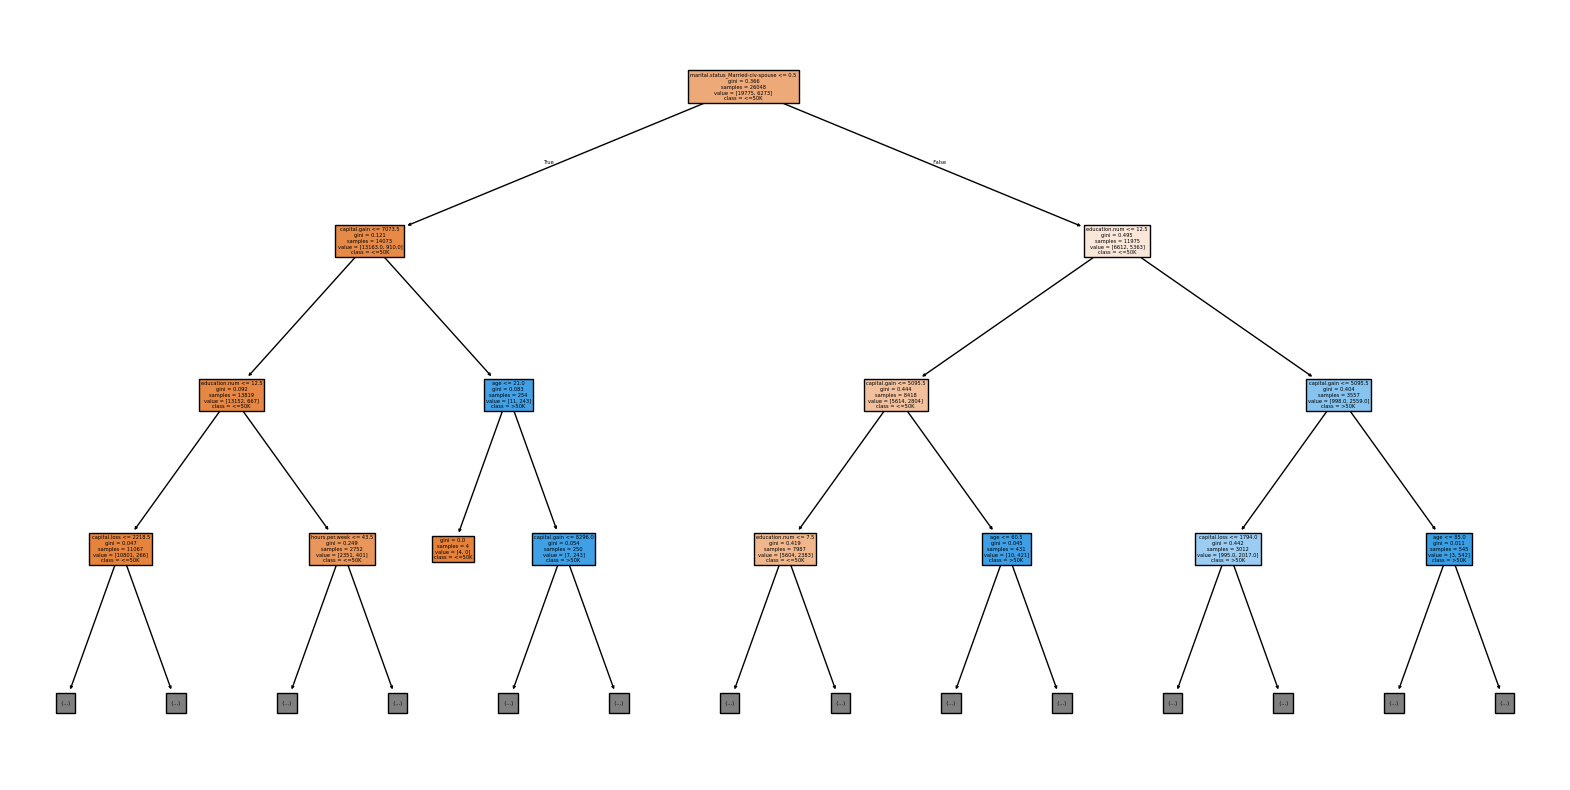

In [165]:
#Tree Visualisation
from sklearn.tree import plot_tree

dt_clf = dt_model.named_steps['classifier']
plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=all_features, class_names=['<=50K','>50K'], filled=True, max_depth=3)
plt.show()


Feature importance quantifies how much each feature influences the model’s predictions, helping identify the most impactful features.

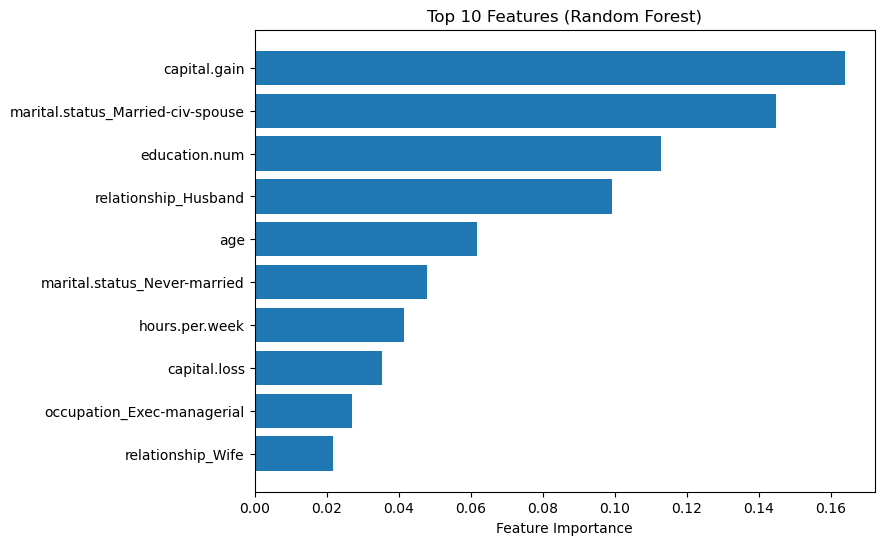

In [166]:
# Feature importance plot
rf_clf = rf_model.named_steps['classifier']
feature_names = rf_model.named_steps['preprocess'].transformers_[0][1].get_feature_names_out(categorical_features)
all_features = np.concatenate([feature_names, numerical_features])
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), all_features[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features (Random Forest)")
plt.show()

SHAP values quantify the contribution of each feature to a model’s prediction, and the SHAP summary plot visually shows the impact and importance of all features across the dataset.

100%|===================| 13010/13026 [00:59<00:00]        

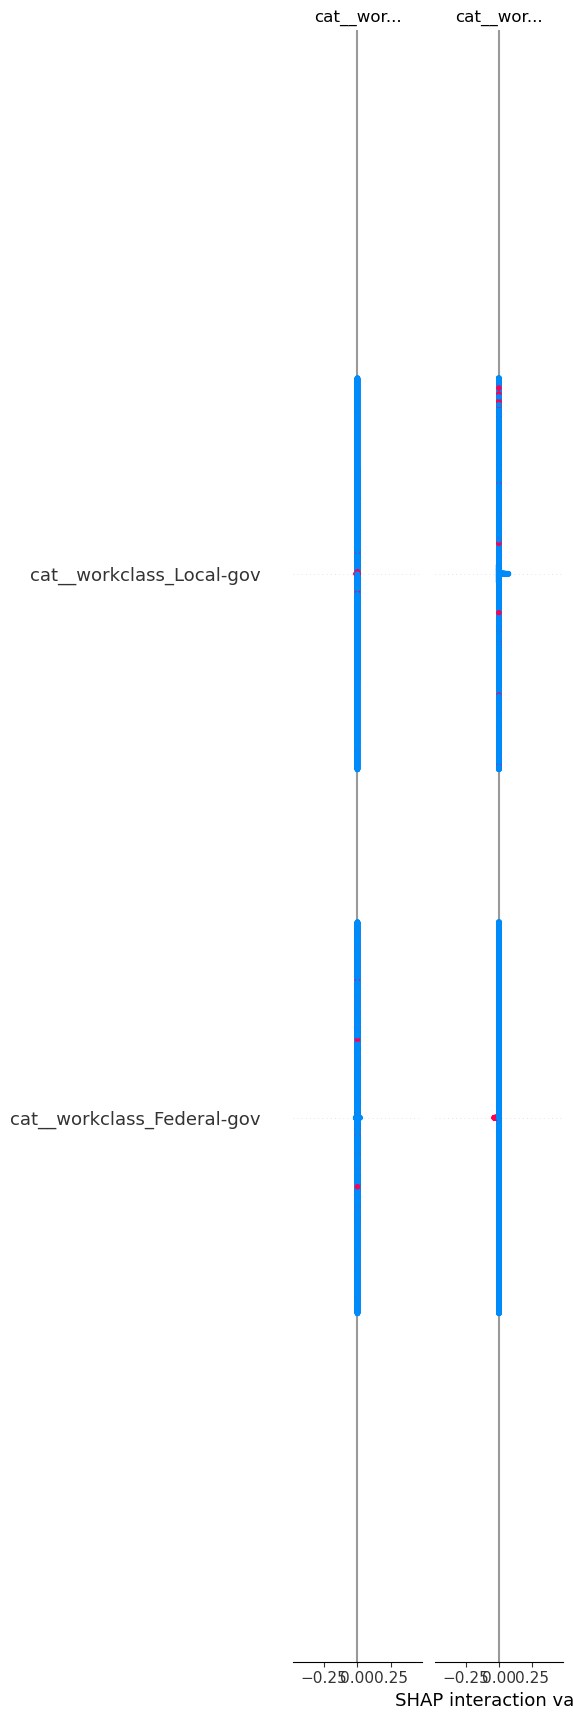

In [167]:
import shap
import pandas as pd

# Transform test data
X_test_transformed = rf_model.named_steps['preprocess'].transform(X_test)

# Convert transformed array to DataFrame using the pipeline's get_feature_names_out
try:
    all_features = rf_model.named_steps['preprocess'].get_feature_names_out()
except:
    # Fallback: if older sklearn version
    # You can build manually, but need to match shape exactly
    all_features = [f'feature_{i}' for i in range(X_test_transformed.shape[1])]

X_test_df = pd.DataFrame(X_test_transformed, columns=all_features)

# SHAP explainer 
explainer = shap.Explainer(rf_model.named_steps['classifier'], X_test_df)
shap_values = explainer(X_test_df)

# SHAP summary plot for positive class
shap.summary_plot(
    shap_values.values,
    X_test_df,
    max_display=20
)
